# Stout Take-home Challenge

# Case Study 1

# Executive Summary
In this report, I conducted an exploratory data analysis on the transaction data and identify 4 underlying data issues. I then took actions to further address the issues, and build 3 machine learning models (Logistic Regression, Random Forest & XGBoost) to predict default rate. 

It turned out that Random Forest performs the best with 98% out-of-sample prediction accuracy.

## Exploratory analysis

### Data description

This is a data set with 6362620 rows of syhthetic mobile money transactions and no null value. It has 11 variables with 8 numeric variables and 5 categorical vatiables, and none of the variables follows normal distribution.

### Data issues
The data set have the following issues:
1. Imbalance data issue
  99.87% of the data is not fraud, while only 0.13% of the data is fraud.
2. Fraud detection accuracy issue
  There are 6362604 fraud data, while only 16 of them are flagged as fraud.
3. Data correlation
  There are high correlation between two pairs of variables: oldBalanceOrg and newBalanceOrg, oldBalanceDest and newBalanceDest.
4. Data distribution
  For example,the "amount" data is right skewed.

## Data Cleansing & Model Building
In this section, I performed data cleansing (dropped highly correlated independent variables and irrelevant variables, turned numeric data into categorical data used SMOTE to due with data imbalance issue), built 3 models and evaluated their performance against Accuracy, Precision, Recall and F1.

## Next Step
There are 3 steps I would take for model enhancement if given more time:
First, perform parameter tuning to further improve existing model performance
Second, conduct feature importance for Random Forest model to get a better understanding of what features contributes the most to determining fraud
Third, explore more machine learning models to see if the performance can be better.

In [60]:
pip install nbconvert

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import statsmodels.api as sm

# Data Preparation and visualization
import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.under_sampling import RandomUnderSampler  
from sklearn.preprocessing import StandardScaler   
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from pylab import rcParams

# Model Selection & model traning 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, f1_score, auc, confusion_matrix
import time
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn import metrics   
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


# Expand the size of terminal window to display all rows
pd.set_option('display.max_columns', 500) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd '/content/drive/MyDrive/Stout_takehome'

/content/drive/MyDrive/Stout_takehome


In [ ]:
!unzip '/content/drive/MyDrive/Stout_takehome/archive.zip'

Archive:  /content/drive/MyDrive/Stout_takehome/archive.zip
replace PS_20174392719_1491204439457_log.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [4]:
# Load data into dataframe
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.dtypes

step                int64
type               object
amount            float64
newbalanceOrig    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [ ]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
## check for missing data
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
data.count()

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


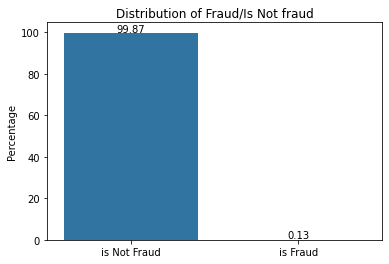

In [ ]:
## check for data balance
pct = (data.isFraud.values == 0).mean()

plot = sns.barplot(['is Not Fraud','is Fraud'],[pct*100, (1-pct)*100])
plot.set(ylabel = 'Percentage')
plt.title("Distribution of Fraud/Is Not fraud") 

for i in range(2):
    a = plot.patches[i]
    height = a.get_height()
    value = abs(pct - i)
    plot.text(a.get_x() + a.get_width()/2., height + 0.5, round(value * 100, 2), ha = "center")

There appears to be a data imbalance issue: 99.87% of the data is not fraud, while only 0.13% of the data is fraud.

I would assume the 'isFlaggedFraud' variable as current fraud detection outcome. From the data, I can see that the current fraud detection accuracy is very low. This would pose another data issue.

## Data Visualization
Generate a minimum of 5 unique visualizations

<Figure size 864x144 with 0 Axes>

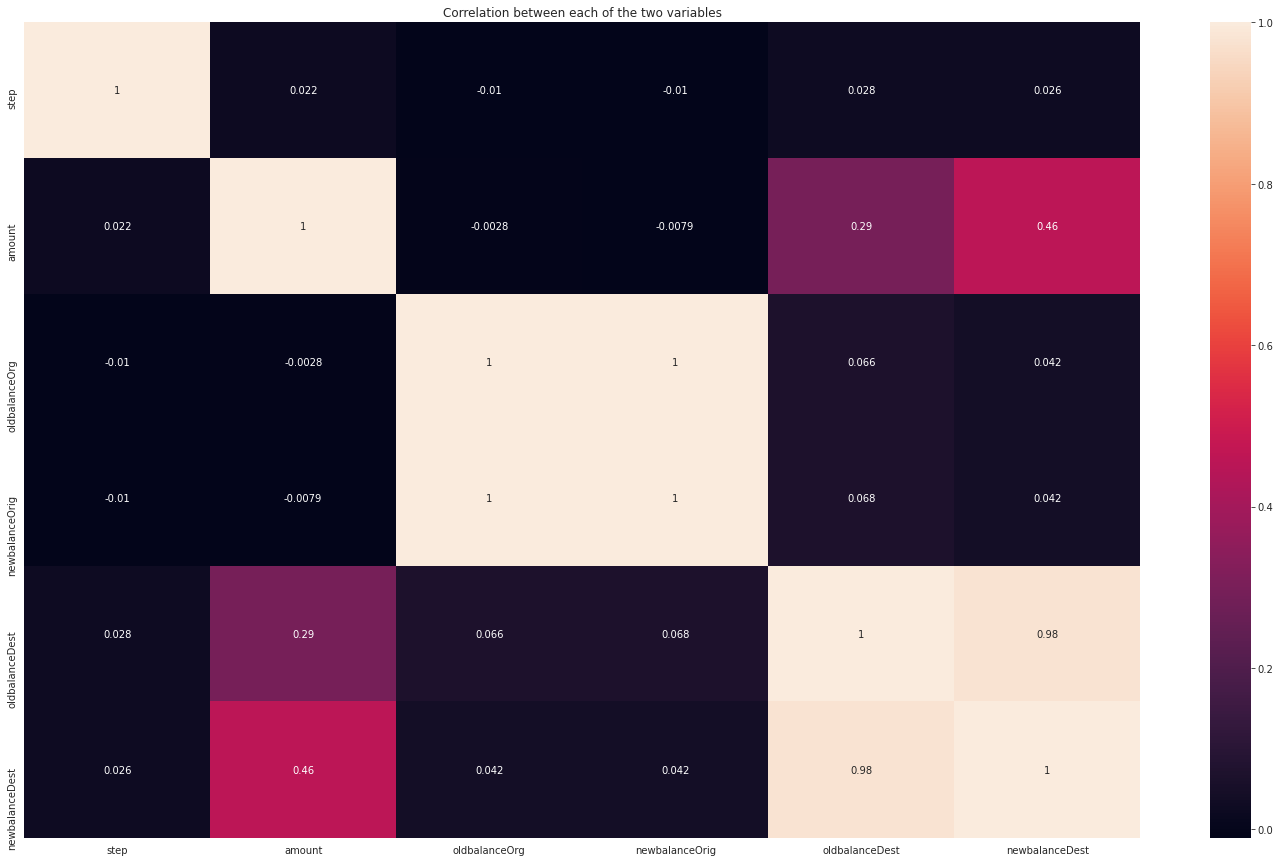

In [8]:
data.shape
fig = plt.figure(figsize=(12,2))
#looking at correlations between each of the two variables
data_matrix = data[data.columns[:-2]].corr()
plt.subplots(figsize=(25, 15))
plt.title('Correlation between each of the two variables')
sns.heatmap(data_matrix,annot=True)
plt.show()

We can see that there are high correlation between two pairs of variables: oldBalanceOrg and newBalanceOrg, oldBalanceDest and newBalanceDest.

In [6]:
## Split the dataset based on whether the user has download the app. "1" as "download" and "0" as "not dowload"
t0 = data.loc[data['isFraud'] == 0]
t1 = data.loc[data['isFraud'] == 1]

<Figure size 432x288 with 0 Axes>

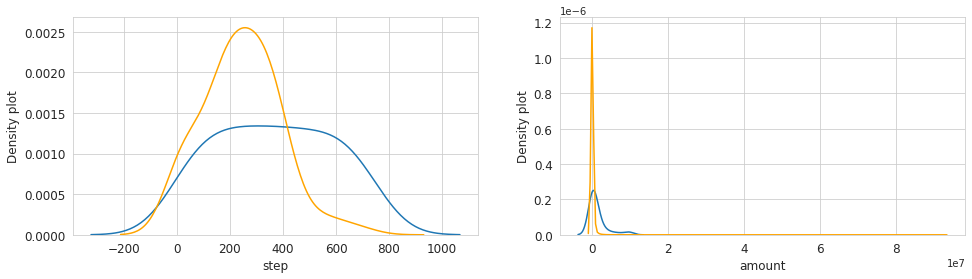

In [7]:
import matplotlib.patches as mpatches
####### check ######
var = ['step','amount']

i = 0

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(1,4,figsize=(16,4))

for feature in var:
    i += 1
    plt.subplot(1,2,i)
    sns.kdeplot(t1[feature], bw_method=0.5)
    sns.kdeplot(t0[feature], bw_method=0.5, color = 'Orange')
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


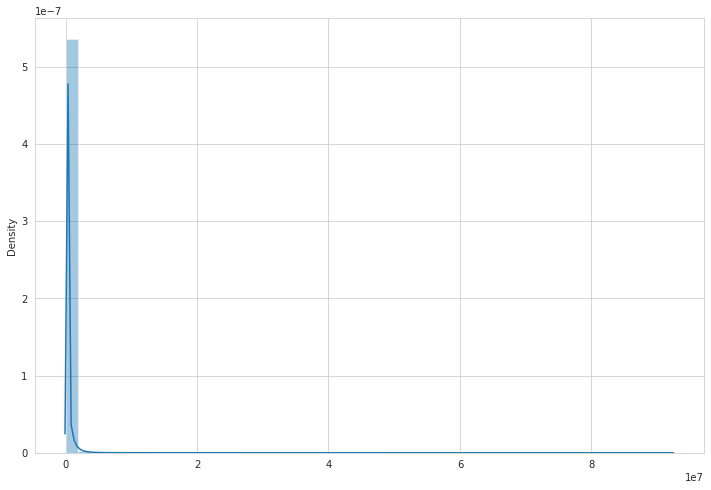

In [9]:
# check the distribution of the "amount" data type
amount = [data['amount'].values]
plt.figure(figsize=(12,8))
sns.distplot(amount)
plt.show()

We can see that the "amount" variable is right skewed. 

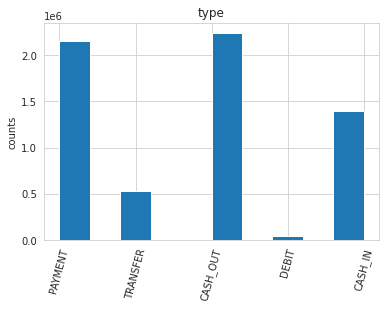

In [12]:
# check the number of transactions for different type
data_col_type = data['type']
plt.figure()
data_col_type.hist()
plt.ylabel('counts')
plt.xticks(rotation = 75)
plt.title('Number of Transactions for Different Type')
plt.show()

In [ ]:
data['isFraud'].value_counts()
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

We also learn that there are uneven amount of transaction type, with payment being the highest.

## Data cleansing & manipulation

Conduct data cleansing & manipulation and create a feature set. Perform prediction of fraudulent transactions using at least 2 algorithms. Describe any data cleansing that must be performed.

In [13]:
#Drop features within a pair that has high correlation - mitigate multicollinearity. Parameter to tune: cor value 0.7
features_to_drop = set()
feature_list = [x for x in data_matrix]
n = len(feature_list)
for i in range(n):
    for j in range(i+1, n):
        f1 = feature_list[i]
        f2 = feature_list[j]
        if abs(data_matrix[f1][f2]) > 0.7: features_to_drop.add(f1)

In [ ]:
features_to_drop

{'oldbalanceDest', 'oldbalanceOrg'}

In [14]:
## drop independent variables with high correlation
data.drop(features_to_drop, inplace = True, axis = 1)

In [15]:
## drop identifiable information, which are not useful for modeling
data.drop(['nameDest', 'nameOrig'], inplace = True, axis = 1)

In [16]:
data.dtypes

step                int64
type               object
amount            float64
newbalanceOrig    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### Split Test Train

As we can see in the previous section, variable "type" a categorical. Next, I will use get_dummies() to transform it into numerical one and conduct a train-test split before modeling.

Furthermore, I will solve the data imbalance issue through the SMOTE pacakage.

In [21]:
X=data.drop(columns=['isFraud'])
Y = data['isFraud']

## Use Onehotencoding to turn categorical variables into numerical variables
X=pd.get_dummies(X, columns = (X.select_dtypes(include = ['object']).columns))

In [20]:
# make the unbalaned data balanced
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x, y = pipeline.fit_resample(X,Y)
counter = Counter(y)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 1270880, 1: 635440})


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Model Building

### Logistic Regression

In [30]:
#Fit logistic regression
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Precision: 0.7403864046850199
Recall   : 0.5321217842813312
Accuracy : 0.7818073565823157
F1 score : 0.6192113153136657


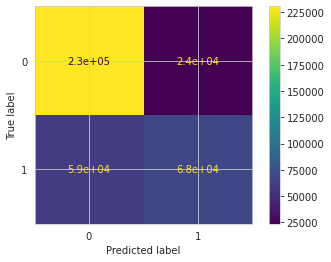

In [31]:
# Out of sample evaluation
y_pred = logit.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(logit, X_test, y_test)  
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall   :', metrics.recall_score(y_test, y_pred))
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))
print('F1 score :', metrics.f1_score(y_test, y_pred))

### Random Forest

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Precision: 0.9785392374275699
Recall   : 0.9685390606561246
Accuracy : 0.9824294976709051
F1 score : 0.9735134686324979


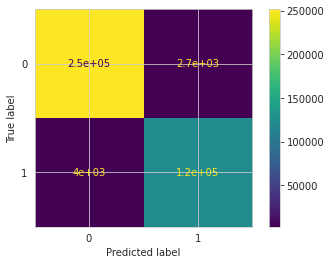

In [38]:
preds = rf.predict(X_test)
confusionMatrix = confusion_matrix(y_test, preds)
plot_confusion_matrix(rf, X_test, y_test)  
print('Precision:', metrics.precision_score(y_test, preds))
print('Recall   :', metrics.recall_score(y_test, preds))
print('Accuracy :', metrics.accuracy_score(y_test, preds))
print('F1 score :', metrics.f1_score(y_test, preds))

In [70]:
# rf = RandomForestClassifier(criterion="gini")
# #Use GridSearchCV for parameter tuning
# parameters = {"n_estimators"    : [100, 200, 500, 800, 1000] ,
#                "min_samples_leaf" : [ 3, 5, 7, 10, 15, 20, 25, 30],
#                "max_depth" : [ 3, 5, 7, 10, 15, 20]}
# model_rf = GridSearchCV(rf, parameters, cv = 5, n_jobs=-1, verbose=1)
# model_rf.fit(X_train, y_train)
# print('Best Model:', model_rf.best_estimator_)
# print('Best score:', model_rf.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [69]:
# #Fit logistic regression
# logit = LogisticRegression(max_iter = 100)
# #Use GridSearchCV for parameter tuning
# parameters = {'C': [0.01, 0.1, 1.0, 10, 100]}
# model_logit = GridSearchCV(logit, parameters, cv = 5, n_jobs=-1, verbose=1)
# model_logit.fit(X_train, y_train)
# print('Best Model:', model_logit.best_estimator_)
# print('Best score:', model_logit.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.4min finished


Best Model: LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best score: 0.7827450270047107


### XGBoost

In [26]:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Precision: 0.9522625985601646
Recall   : 0.874124773817953
Accuracy : 0.9434250283268286
F1 score : 0.9115222117396119


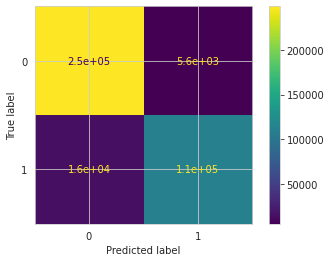

In [29]:
preds = xgboost.predict(X_test)
confusionMatrix = confusion_matrix(y_test, preds)
plot_confusion_matrix(xgboost, X_test, y_test)  
print('Precision:', metrics.precision_score(y_test, preds))
print('Recall   :', metrics.recall_score(y_test, preds))
print('Accuracy :', metrics.accuracy_score(y_test, preds))
print('F1 score :', metrics.f1_score(y_test, preds))

In [35]:
# xgboost = XGBClassifier()
# #Use GridSearchCV for parameter tuning
# parameters = {"learning_rate"    : [0.10, 0.15] ,
#                "max_depth"        : [ 3, 4, 6, 10, 15],
#                "min_child_weight" : [ 3, 5, 7, 12],
#                "gamma"            : [ 0.1, 0.4],
#                "colsample_bytree" : [ 0.3, 0.5]}
# model_xgboost = GridSearchCV(xgboost, parameters, cv = 3, n_jobs=-1, verbose=1)
# model_xgboost.fit(X_train, y_train)
# print('Best Model:', model_xgboost.best_estimator_)
# print('Best score:', model_xgboost.best_score_)

If given more time, I will perform parameter tuning (as shown in the commented sample code) to further improve model performance and explore more models.

# Case Study 2

## Observations

There are a couple of ineresting observations through the analysis. 

1. Overall the company did a good job in customer retention and new customer acquisition from 2015 - 2017. Its customer retention rate is 97% and the number of new customers are 1.5 times more than lost customers.

2. The company sees a decrease of revenue in 2016 fllowed by a bounce-back in 2017. The revenue of existing customers almost remained the same, but new customer revenue growth was strong over the 3 year period. 

3. Although exiting customer revenue still determined the trend of total revenue, it looks like new customer growth had a significant contribution to the revenue increase in 2017. It implies that the company should spend more resources in customer acquisition to look for growth opportunities.



In [96]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

In [39]:
df = pd.read_csv('casestudy.csv')
df.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [40]:
df['year'].value_counts()

2017    249987
2015    231294
2016    204646
Name: year, dtype: int64

### The sum of revenue for each year

In [41]:
df.groupby('year')['net_revenue'].sum()

year
2015    29036749.19
2016    25730943.59
2017    31417495.03
Name: net_revenue, dtype: float64

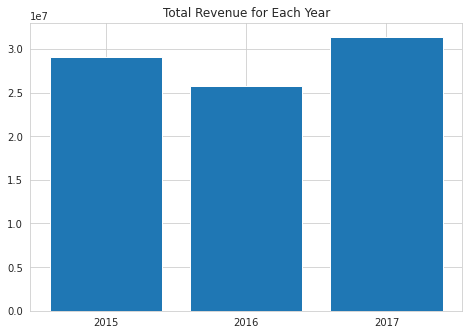

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = ['2015','2016','2017']
revenue =[29036749.19, 25730943.59, 31417495.03]
ax.bar(years, revenue)
plt.title('Total Revenue for Each Year')
plt.show()

Total revenue decreased in 2016 but reaches 3-year high.

### New Customer Revenue 
e.g. new customers not present in previous year only

In [44]:
## filter out 2015 customer 
cus_2015 = df[df['year'] == 2015]
cus_2016 = df[df['year'] == 2016]
cus_2017 = df[df['year'] == 2017]

In [45]:
new_revenue_2016 = cus_2016[~cus_2016['customer_email'].isin(cus_2015['customer_email'])]

In [46]:
new_revenue_2016['net_revenue'].sum()

18245491.01

In [47]:
## Total revenue of new customer in 2017 
new_revenue_2017 = cus_2017[~cus_2017['customer_email'].isin(cus_2015['customer_email'])
                            & ~cus_2017['customer_email'].isin(cus_2016['customer_email'])]

In [48]:
new_revenue_2017['net_revenue'].sum()

28676607.64

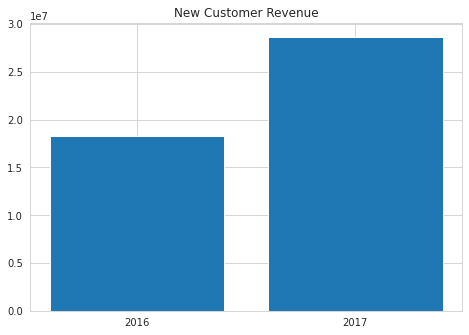

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = ['2016','2017']
revenue =[18245491.01, 28676607.64]
ax.bar(years, revenue)
plt.title('New Customer Revenue')
plt.show()

In [56]:
(28676607.64 - 18245491.01)/18245491.01

0.5717092855589858

There's a 57% revenue increase bought by new customers from 2016 to 2017

### Existing Customer Growth. 

To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

In [33]:
## filter out customer in 2017 who are also in 2016 
exist_2017 = cus_2017[cus_2017['customer_email'].isin(cus_2016['customer_email'])]['net_revenue'].sum()

In [34]:
## Calculate the net growth 
exist_2016 = cus_2016[cus_2016['customer_email'].isin(cus_2017['customer_email'])]['net_revenue'].sum()

In [35]:
## Net revenue growth of existing customer in 2016 
net_growth_2016 = exist_2017 - exist_2016
net_growth_2016

20611.340000000317

In [36]:
## filter out customer existing in 2016 and 2015 
exist_2016_new = cus_2016[cus_2016['customer_email'].isin(cus_2015['customer_email'])]['net_revenue'].sum()
exist_2015 = cus_2015[cus_2015['customer_email'].isin(cus_2016['customer_email'])]['net_revenue'].sum()

In [37]:
## Net revenue growth of existing customer from 2015 to 2016 (2016 - 2015 )
net_growth_2015 = exist_2016_new - exist_2015
net_growth_2015

20335.459999999963

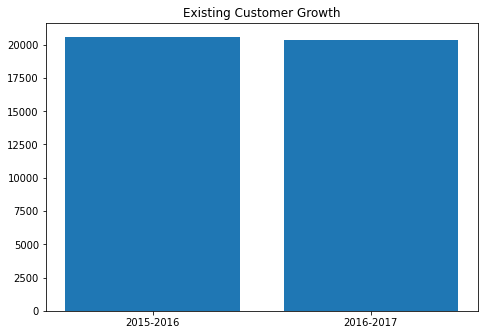

In [97]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = ['2015-2016','2016-2017']
revenue =[20611.340000000317, 20335.459999999963]
ax.bar(years, revenue)
plt.title('Existing Customer Growth')
plt.show()

Existing customer growth hasn't changed much in the 3-year period.

## Revenue lost from attrition

### Existing Customer Revenue Current Year

In [90]:
revenue_year = [cus_2015['net_revenue'].sum(),cus_2016['net_revenue'].sum(),cus_2017['net_revenue'].sum()]
revenue_year

[29036749.189999994, 25730943.59, 31417495.030000016]

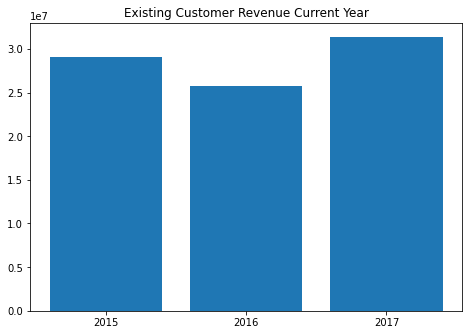

In [95]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = ['2015','2016','2017']
revenue =[29036749.189999994, 25730943.59, 31417495.030000016]
ax.bar(years, revenue)
plt.title('Existing Customer Revenue Current Year')
plt.show()

The existing customer revenue decreased in 2016 but reached to the highest in 2017. The pattern is similar to the total revenue. Therefore, it's reasonable to make an assumption that existing customers are the main driver for revenue at the company from 2015 to 2017, given no other factors with significant changes invovled.

### Existing Customer Revenue Prior Year

#### Total Customers Current Year

In [42]:
print('total num of customers in 2015:',cus_2015['customer_email'].nunique())
print('total num of customers in 2016:',cus_2016['customer_email'].nunique())
print('total num of customers in 2017:',cus_2017['customer_email'].nunique())

total num of customers in 2015: 231294
total num of customers in 2016: 204646
total num of customers in 2017: 249987


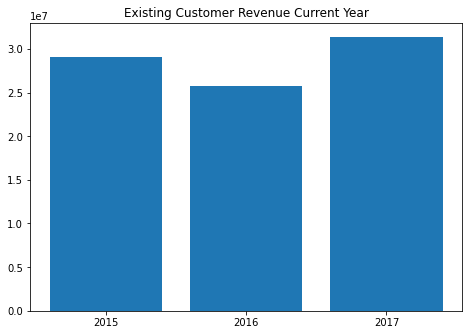

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = ['2015','2016','2017']
revenue =[231294, 204646, 249987]
ax.bar(years, revenue)
plt.title('Total Customers Current Year')
plt.show()

#### Total Customers Previous Year 

- Total customers previous to 2015 is 0

In [44]:
print('Total Customers Previous Year 2016: ',df[df['year'] < 2016]['customer_email'].nunique())
print('Total Customers Previous Year 2017: ',df[df['year'] < 2017]['customer_email'].nunique())

Total Customers Previous Year 2016:  231294
Total Customers Previous Year 2017:  376356


In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = ['<2016','<2017']
revenue =[231294, 376356]
ax.bar(years, revenue)
plt.title('Total Customers Previous Year')
plt.show()

### New Customers

In [48]:
new_cus_2016 = cus_2016[~cus_2016['customer_email'].isin(cus_2015['customer_email'])]
new_cus_2017 = cus_2017[~cus_2017['customer_email'].isin(cus_2016['customer_email'])]
print('total new customers: ', pd.concat([new_cus_2016,new_cus_2017])['customer_email'].nunique())

total new customers:  374090


### Lost Customers 

In [50]:
lost_cus_2016 = cus_2015[~cus_2015['customer_email'].isin(cus_2016['customer_email'])]
lost_cus_2017 = cus_2016[~cus_2016['customer_email'].isin(cus_2017['customer_email'])]
print('total lost customers: ', pd.concat([lost_cus_2016,lost_cus_2017])['customer_email'].nunique())

total lost customers:  355397


In [59]:

# Calculate retention rate
# (total customer at the end of the period - new customers) / total customer in the begining of the period * 100
(376356 - 374090)/231294 * 100

0.9797054830648438

Overall, the company has done a good job in customer acquisition and retention. It has 97% of retention rate and the number of new customers are 1.5 times more than the lost customers.